**Importing necesary pacages**

In [ ]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Statistical Analysis
from scipy import stats



# For Jupyter notebooks
from IPython.display import display


In [ ]:
# Load the dataset
data = pd.read_csv(r"/content/dft-road-casualty-statistics-collision-provisional-mid-year-unvalidated-2023.csv")
data.head()

<ipython-input-2-afad436f5a1a>:2: DtypeWarning: Columns (0,2,35) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"/content/dft-road-casualty-statistics-collision-provisional-mid-year-unvalidated-2023.csv")


,collision_index,collision_year,collision_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,legacy_collision_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_collision,trunk_road_flag,lsoa_of_collision_location
0,2023010419171,2023,10419171,525060.0,170416.0,-0.202878,51.418974,1,3,1,...,5,4,8,2,0,0,-1,1,-1,E01003383
1,2023010419183,2023,10419183,535463.0,198745.0,-0.042464,51.671155,1,3,3,...,1,4,1,1,0,0,-1,1,-1,E01001547
2,2023010419189,2023,10419189,508702.0,177696.0,-0.435789,51.487777,1,3,2,...,0,4,1,1,0,0,-1,1,-1,E01002448
3,2023010419191,2023,10419191,520341.0,190175.0,-0.263972,51.597575,1,3,2,...,0,4,9,1,0,0,-1,1,-1,E01000129
4,2023010419192,2023,10419192,527255.0,176963.0,-0.168976,51.477324,1,3,2,...,0,4,1,1,0,0,-1,1,-1,E01004583


In [ ]:
# Check for missing values
print(data.isnull().sum())

collision_index                                  0
collision_year                                   0
collision_reference                              0
location_easting_osgr                           84
location_northing_osgr                          84
longitude                                       84
latitude                                        84
police_force                                     0
legacy_collision_severity                        0
number_of_vehicles                               0
number_of_casualties                             0
date                                             0
day_of_week                                      0
time                                             0
local_authority_district                         0
local_authority_ons_district                     0
local_authority_highway                          0
first_road_class                                 0
first_road_number                                0
road_type                      

In [ ]:
#dropping null values
data.dropna(inplace=True)

In [ ]:
# Find duplicate rows
duplicates = data.duplicated()
print(data[duplicates])


Empty DataFrame
Columns: [collision_index, collision_year, collision_reference, location_easting_osgr, location_northing_osgr, longitude, latitude, police_force, legacy_collision_severity, number_of_vehicles, number_of_casualties, date, day_of_week, time, local_authority_district, local_authority_ons_district, local_authority_highway, first_road_class, first_road_number, road_type, speed_limit, junction_detail, junction_control, second_road_class, second_road_number, pedestrian_crossing_human_control, pedestrian_crossing_physical_facilities, light_conditions, weather_conditions, road_surface_conditions, special_conditions_at_site, carriageway_hazards, urban_or_rural_area, did_police_officer_attend_scene_of_collision, trunk_road_flag, lsoa_of_collision_location]
Index: []

[0 rows x 36 columns]


In [ ]:
print(data.dtypes)


collision_index                                  object
collision_year                                    int64
collision_reference                              object
location_easting_osgr                           float64
location_northing_osgr                          float64
longitude                                       float64
latitude                                        float64
police_force                                      int64
legacy_collision_severity                         int64
number_of_vehicles                                int64
number_of_casualties                              int64
date                                             object
day_of_week                                       int64
time                                             object
local_authority_district                          int64
local_authority_ons_district                     object
local_authority_highway                          object
first_road_class                                

In [ ]:
# List unique values for each column
unique_values = {col: data[col].unique() for col in data.columns}

# Print unique values for each column
for col, values in unique_values.items():
    print(f"Unique values in column '{col}':")
    print(values)
    print()

Unique values in column 'collision_index':
[2023010419171 2023010419183 2023010419189 ... 2023991366235 2023991369054
 2023991369155]

Unique values in column 'collision_year':
[2023]

Unique values in column 'collision_reference':
[10419171 10419183 10419189 ... 991366235 991369054 991369155]

Unique values in column 'location_easting_osgr':
[525060. 535463. 508702. ... 291253. 248192. 249164.]

Unique values in column 'location_northing_osgr':
[170416. 198745. 177696. ... 753153. 854679. 664869.]

Unique values in column 'longitude':
[-0.202878 -0.042464 -0.435789 ... -3.775543 -4.538916 -4.411139]

Unique values in column 'latitude':
[51.418974 51.671155 51.487777 ... 56.657487 57.556636 55.853356]

Unique values in column 'police_force':
[ 1  3  4  5  6  7 10 11 12 13 14 16 17 20 21 22 23 30 31 32 33 34 35 36
 37 40 41 42 43 44 45 46 47 48 50 52 53 54 55 60 61 62 63 99]

Unique values in column 'legacy_collision_severity':
[3 2 1]

Unique values in column 'number_of_vehicles':
[ 1 

In [ ]:
# Drop columns where the unique value is -1
columns_to_drop = [col for col in data.columns if len(data[col].unique()) == 1 and data[col].unique()[0] == -1]
data = data.drop(columns=columns_to_drop)

print(f"Columns dropped: {columns_to_drop}")
print("Updated DataFrame:")
print(data.head())

Columns dropped: ['local_authority_district', 'urban_or_rural_area', 'trunk_road_flag']
Updated DataFrame:
  collision_index  collision_year collision_reference  location_easting_osgr  \
0   2023010419171            2023            10419171               525060.0   
1   2023010419183            2023            10419183               535463.0   
2   2023010419189            2023            10419189               508702.0   
3   2023010419191            2023            10419191               520341.0   
4   2023010419192            2023            10419192               527255.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                170416.0  -0.202878  51.418974             1   
1                198745.0  -0.042464  51.671155             1   
2                177696.0  -0.435789  51.487777             1   
3                190175.0  -0.263972  51.597575             1   
4                176963.0  -0.168976  51.477324             1   

   legacy_collision_s

In [ ]:
data.isnull().sum()
#checking for nll values

,0
collision_index,0
collision_year,0
collision_reference,0
location_easting_osgr,0
location_northing_osgr,0
longitude,0
latitude,0
police_force,0
legacy_collision_severity,0
number_of_vehicles,0


In [ ]:
# List unique values for each column
unique_values = {col: data[col].unique() for col in data.columns}

# Print unique values for each column
for col, values in unique_values.items():
    print(f"Unique values in column '{col}':")
    print(values)
    print()

Unique values in column 'collision_index':
[2023010419171 2023010419183 2023010419189 ... 2023991366235 2023991369054
 2023991369155]

Unique values in column 'collision_year':
[2023]

Unique values in column 'collision_reference':
[10419171 10419183 10419189 ... 991366235 991369054 991369155]

Unique values in column 'location_easting_osgr':
[525060. 535463. 508702. ... 291253. 248192. 249164.]

Unique values in column 'location_northing_osgr':
[170416. 198745. 177696. ... 753153. 854679. 664869.]

Unique values in column 'longitude':
[-0.202878 -0.042464 -0.435789 ... -3.775543 -4.538916 -4.411139]

Unique values in column 'latitude':
[51.418974 51.671155 51.487777 ... 56.657487 57.556636 55.853356]

Unique values in column 'police_force':
[ 1  3  4  5  6  7 10 11 12 13 14 16 17 20 21 22 23 30 31 32 33 34 35 36
 37 40 41 42 43 44 45 46 47 48 50 52 53 54 55 60 61 62 63 99]

Unique values in column 'legacy_collision_severity':
[3 2 1]

Unique values in column 'number_of_vehicles':
[ 1 

In [ ]:

# List of columns to keep,
columns_to_keep = [
     'number_of_vehicles', 'number_of_casualties',
    'day_of_week',
    'first_road_class', 'first_road_number', 'road_type',
    'speed_limit', 'junction_detail', 'junction_control',
    'light_conditions', 'weather_conditions', 'road_surface_conditions',
    'special_conditions_at_site',
    'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities',
    'did_police_officer_attend_scene_of_collision',
    'legacy_collision_severity'  # Added target variable
]

# Drop columns not in the list
data_cleaned = data[columns_to_keep]

# Display the cleaned DataFrame
print(data_cleaned.head())

# Calculate the number of columns dropped
original_columns = data.columns
cleaned_columns = data_cleaned.columns
dropped_columns = original_columns.difference(cleaned_columns)

print(f"Number of columns dropped: {len(dropped_columns)}")
print(f"Dropped columns: {dropped_columns.tolist()}")


   number_of_vehicles  number_of_casualties  day_of_week  first_road_class  \
0                   1                     1            1                 5   
1                   3                     2            1                 6   
2                   2                     1            1                 3   
3                   2                     1            1                 3   
4                   2                     1            1                 3   

   first_road_number  road_type  speed_limit  junction_detail  \
0                  0          2           20                9   
1                  0          6           30                3   
2                437          1           30                1   
3                  5          6           30                3   
4               3220          6           30                8   

   junction_control  light_conditions  weather_conditions  \
0                 4                 4                   8   
1                 

In [ ]:
# List unique values for each column
unique_values = {col: data_cleaned[col].unique() for col in data_cleaned.columns}

# Print unique values for each column
for col, values in unique_values.items():
    print(f"Unique values in column '{col}':")
    print(values)
    print()

Unique values in column 'number_of_vehicles':
[ 1  3  2  5  6  4  7  8 12 14 13  9 11 10 17 15]

Unique values in column 'number_of_casualties':
[ 1  2  3  4  6  5  7  9 12  8 11 17 10 70 19]

Unique values in column 'day_of_week':
[1 2 3 4 5 6 7]

Unique values in column 'first_road_class':
[5 6 3 4 1 2]

Unique values in column 'first_road_number':
[  0 437   5 ... 805 800 799]

Unique values in column 'road_type':
[2 6 1 3 9 7]

Unique values in column 'speed_limit':
[20 30 50 40 -1 70 60]

Unique values in column 'junction_detail':
[ 9  3  1  8  0  6  2  7 99  5]

Unique values in column 'junction_control':
[ 4 -1  2  9  1  3]

Unique values in column 'light_conditions':
[ 4  1  6  5  7 -1]

Unique values in column 'weather_conditions':
[ 8  1  9  2  5  4  3  7  6 -1]

Unique values in column 'road_surface_conditions':
[ 2  1  9  4  3  5 -1]

Unique values in column 'special_conditions_at_site':
[ 0  9  4  7  3  1  2  5  6 -1]

Unique values in column 'pedestrian_crossing_human_con

In [ ]:
# Drop all rows where any column has -1
data_cleaned = data_cleaned.loc[~(data_cleaned == -1).any(axis=1)]

print(data_cleaned)

       number_of_vehicles  number_of_casualties  day_of_week  \
0                       1                     1            1   
1                       3                     2            1   
2                       2                     1            1   
3                       2                     1            1   
4                       2                     1            1   
...                   ...                   ...          ...   
49307                   2                     1            4   
49308                   2                     1            2   
49309                   1                     1            2   
49310                   1                     1            4   
49311                   2                     1            6   

       first_road_class  first_road_number  road_type  speed_limit  \
0                     5                  0          2           20   
1                     6                  0          6           30   
2                    

In [ ]:
# List unique values for each column
unique_values = {col: data_cleaned[col].unique() for col in data_cleaned.columns}

# Print unique values for each column
for col, values in unique_values.items():
    print(f"Unique values in column '{col}':")
    print(values)
    print()

Unique values in column 'number_of_vehicles':
[ 1  3  2  6  4  5  7  8 11  9 17]

Unique values in column 'number_of_casualties':
[ 1  2  3  4  6  5  7 12  8 17 19]

Unique values in column 'day_of_week':
[1 2 3 4 5 6 7]

Unique values in column 'first_road_class':
[5 6 3 4 1 2]

Unique values in column 'first_road_number':
[  0 437   5 ... 939 964 799]

Unique values in column 'road_type':
[2 6 1 3 9 7]

Unique values in column 'speed_limit':
[20 30 40 50 70 60]

Unique values in column 'junction_detail':
[ 9  3  1  8  6  2  7 99  5  0]

Unique values in column 'junction_control':
[4 2 9 1 3]

Unique values in column 'light_conditions':
[4 1 6 5 7]

Unique values in column 'weather_conditions':
[8 1 9 2 5 4 3 7 6]

Unique values in column 'road_surface_conditions':
[2 1 9 4 3 5]

Unique values in column 'special_conditions_at_site':
[0 9 4 7 3 1 2 6 5]

Unique values in column 'pedestrian_crossing_human_control':
[2 0 1 9]

Unique values in column 'pedestrian_crossing_physical_facilit

In [ ]:
# Get general info about the dataset
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 28370 entries, 0 to 49311
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   number_of_vehicles                            28370 non-null  int64
 1   number_of_casualties                          28370 non-null  int64
 2   day_of_week                                   28370 non-null  int64
 3   first_road_class                              28370 non-null  int64
 4   first_road_number                             28370 non-null  int64
 5   road_type                                     28370 non-null  int64
 6   speed_limit                                   28370 non-null  int64
 7   junction_detail                               28370 non-null  int64
 8   junction_control                              28370 non-null  int64
 9   light_conditions                              28370 non-null  int64
 10  weather_conditi

In [ ]:
# Categorize columns
categorical_columns = [
    'day_of_week',  'first_road_class', 'road_type',
    'junction_detail', 'junction_control', 'light_conditions',
    'weather_conditions', 'road_surface_conditions',
    'special_conditions_at_site', 'pedestrian_crossing_human_control',
    'pedestrian_crossing_physical_facilities',
    'did_police_officer_attend_scene_of_collision'
]

numerical_columns = [
   'number_of_vehicles', 'number_of_casualties',
    'first_road_number'
]

# Display the categorized columns
print(f"Categorical Columns: {categorical_columns}")
print(f"Numerical Columns: {numerical_columns}")

# Convert categorical columns to object dtype
data_cleaned[categorical_columns] = data_cleaned[categorical_columns].astype('object')

# Convert numerical columns to int dtype
data_cleaned[numerical_columns] = data_cleaned[numerical_columns].astype('int')

# Ensure target variable is integer
data_cleaned['legacy_collision_severity'] = data_cleaned['legacy_collision_severity'].astype('category')
# Display the updated DataFrame info
print(data_cleaned.info())

Categorical Columns: ['day_of_week', 'first_road_class', 'road_type', 'junction_detail', 'junction_control', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'did_police_officer_attend_scene_of_collision']
Numerical Columns: ['number_of_vehicles', 'number_of_casualties', 'first_road_number']
<class 'pandas.core.frame.DataFrame'>
Index: 28370 entries, 0 to 49311
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   number_of_vehicles                            28370 non-null  int64   
 1   number_of_casualties                          28370 non-null  int64   
 2   day_of_week                                   28370 non-null  object  
 3   first_road_class                              28370 non-null  object  
 4   first_road_n

**Data Summary Statistics**

In [ ]:
print("\nSummary Statistics for Numerical Columns:")
print(data_cleaned.describe(include='number'))

print("\nSummary Statistics for Categorical Columns:")
print(data_cleaned.describe(include='object'))



Summary Statistics for Numerical Columns:
       number_of_vehicles  number_of_casualties  first_road_number  \
count        28370.000000          28370.000000       28370.000000   
mean             1.840395              1.243461         802.787769   
std              0.590897              0.649607        1576.600459   
min              1.000000              1.000000           0.000000   
25%              2.000000              1.000000           0.000000   
50%              2.000000              1.000000          38.000000   
75%              2.000000              1.000000         552.000000   
max             17.000000             19.000000        9204.000000   

        speed_limit  
count  28370.000000  
mean      32.019739  
std       11.271314  
min       20.000000  
25%       30.000000  
50%       30.000000  
75%       30.000000  
max       70.000000  

Summary Statistics for Categorical Columns:
        day_of_week  first_road_class  road_type  junction_detail  \
count         

**Distribution Analysis**


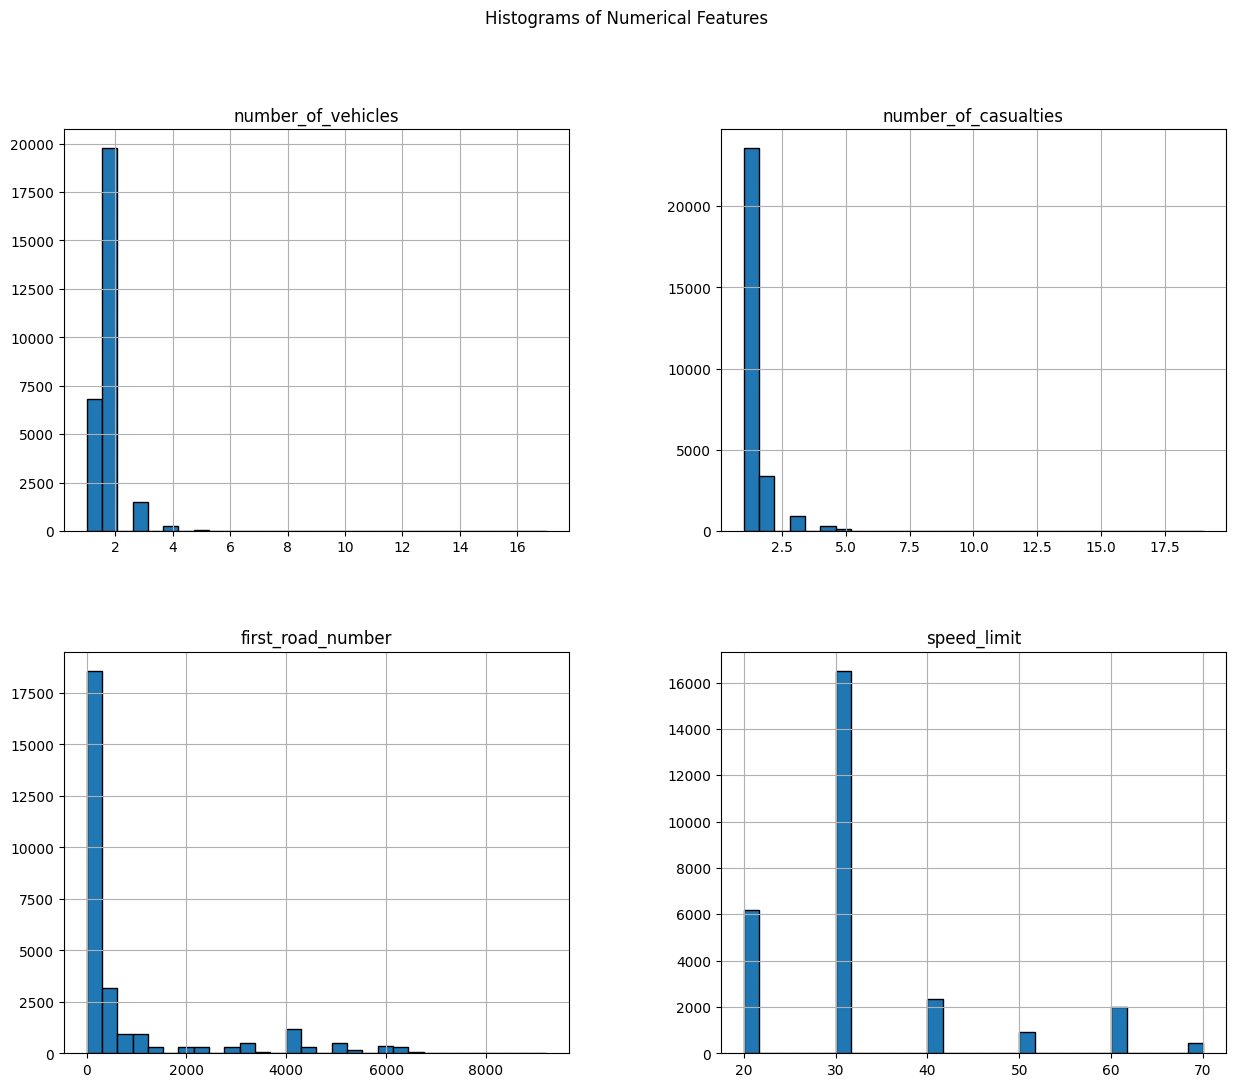

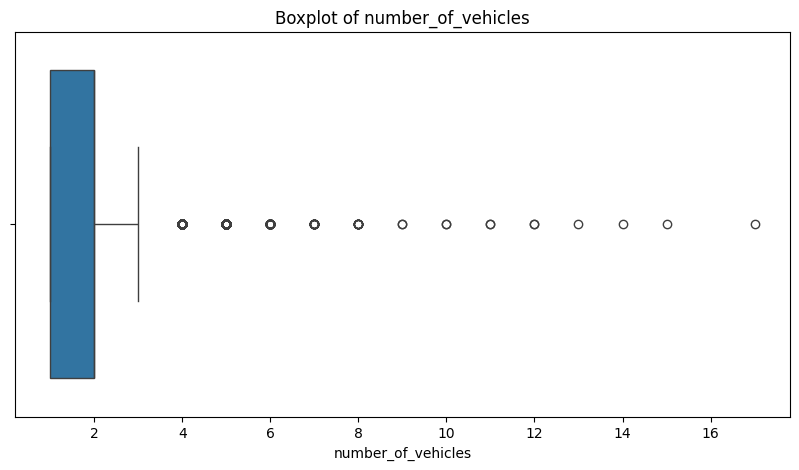

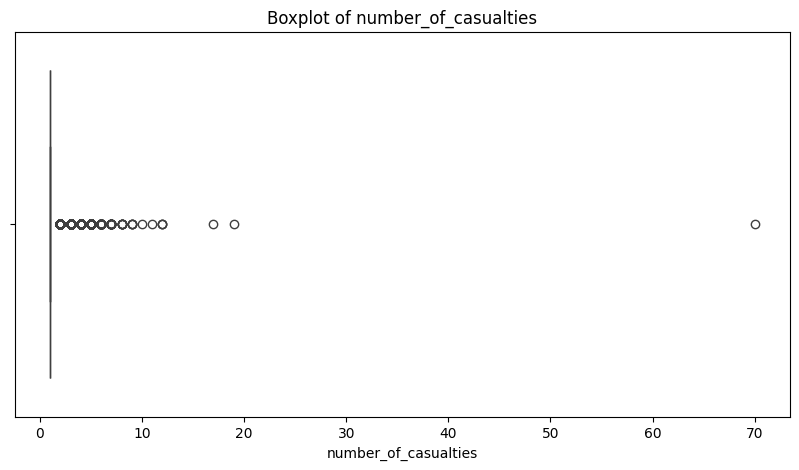

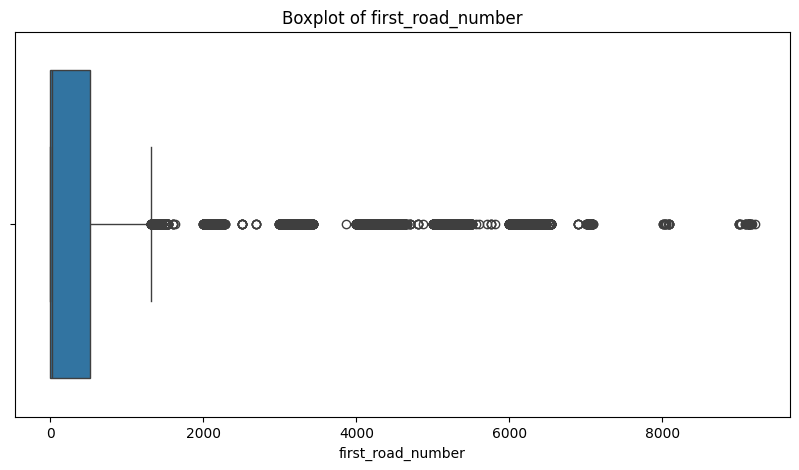

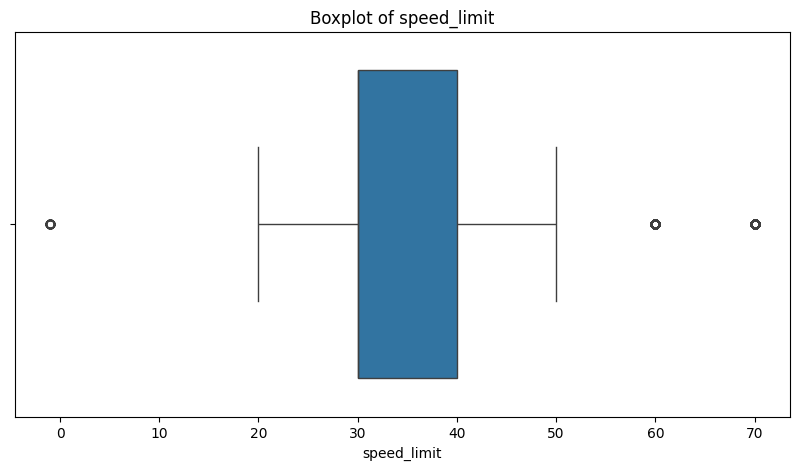

In [ ]:
# Histograms for numerical features
numerical_cols = data_cleaned.select_dtypes(include='number').columns
data_cleaned[numerical_cols].hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Boxplots for numerical features
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


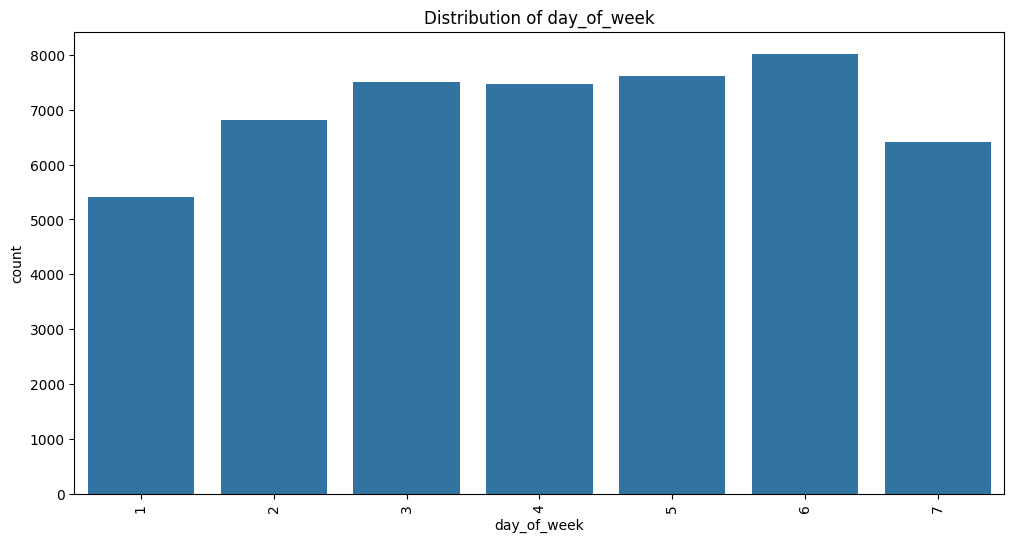

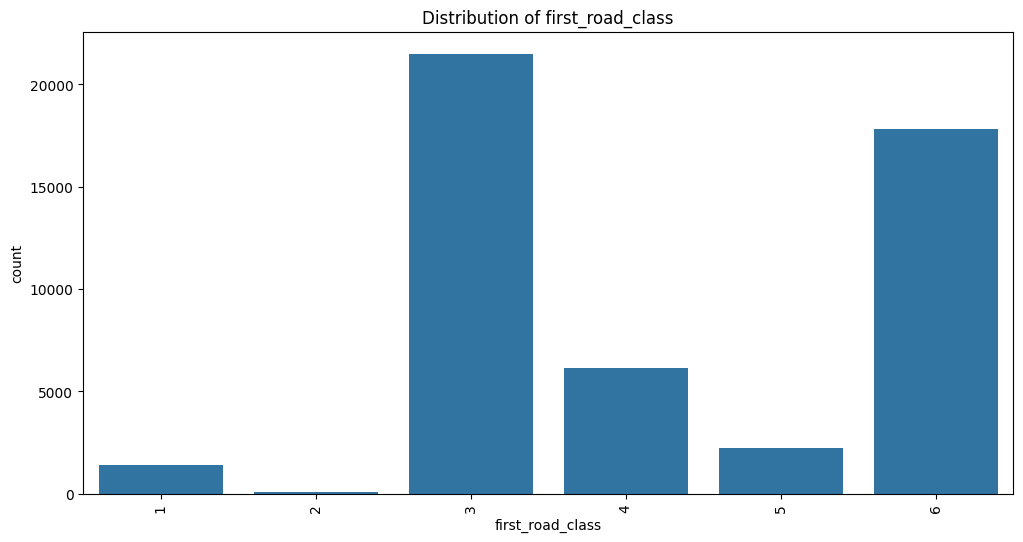

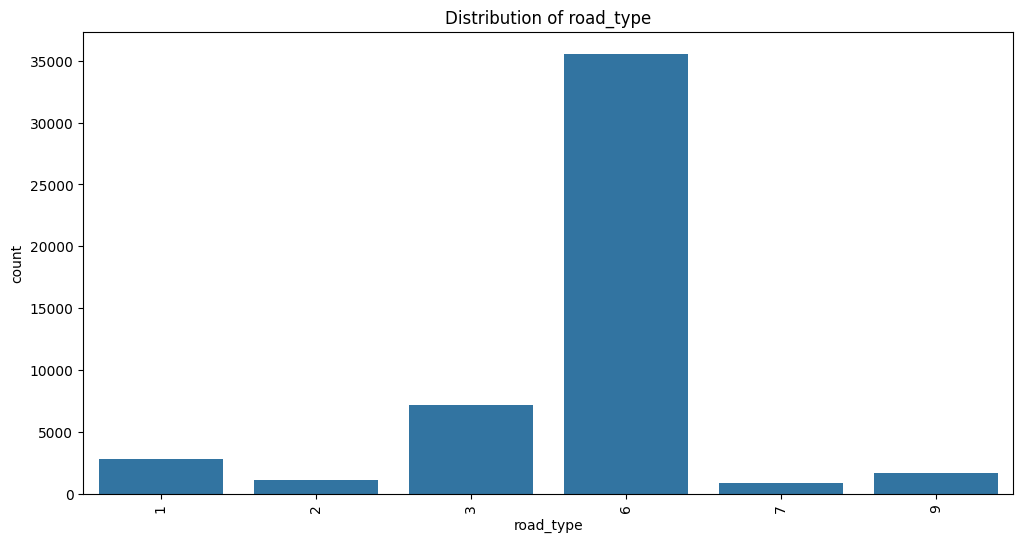

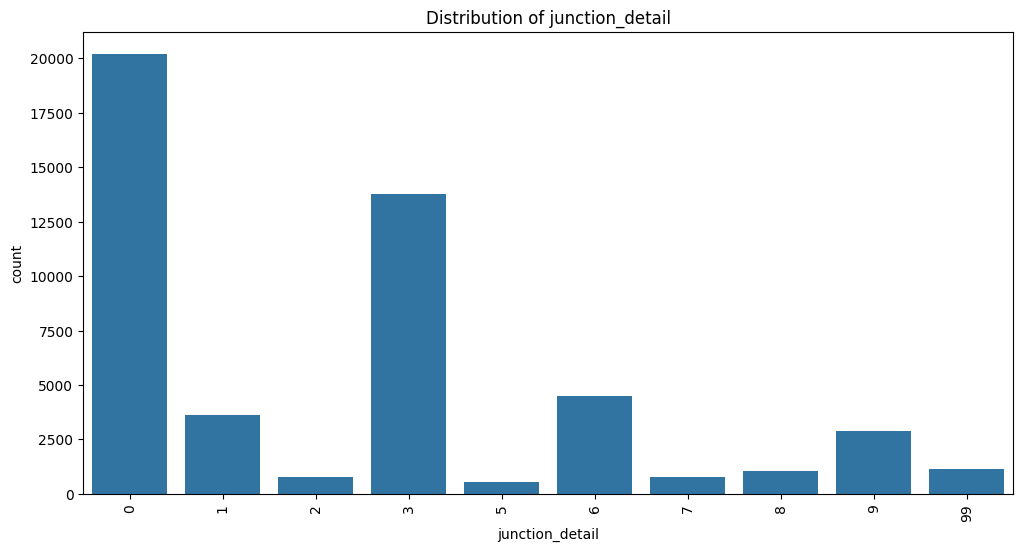

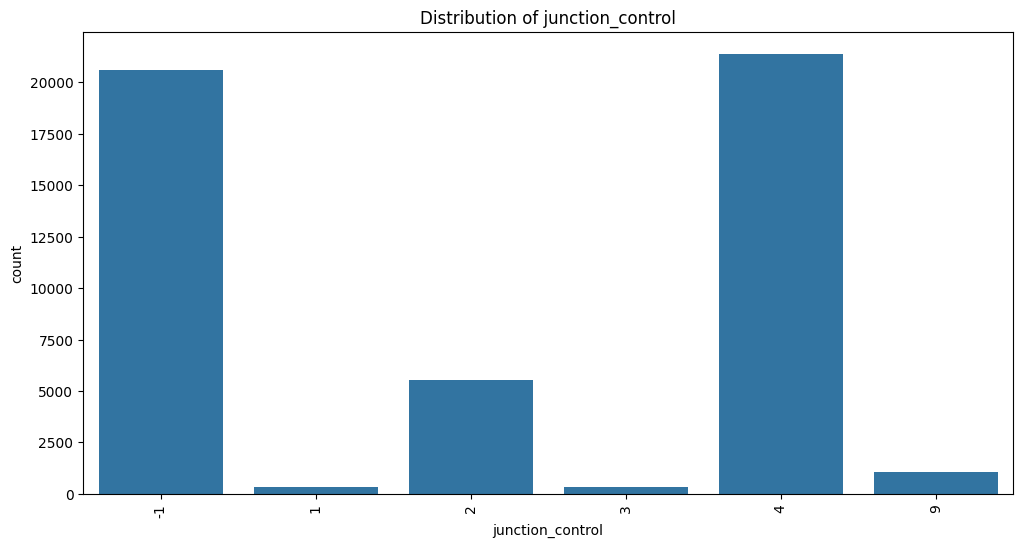

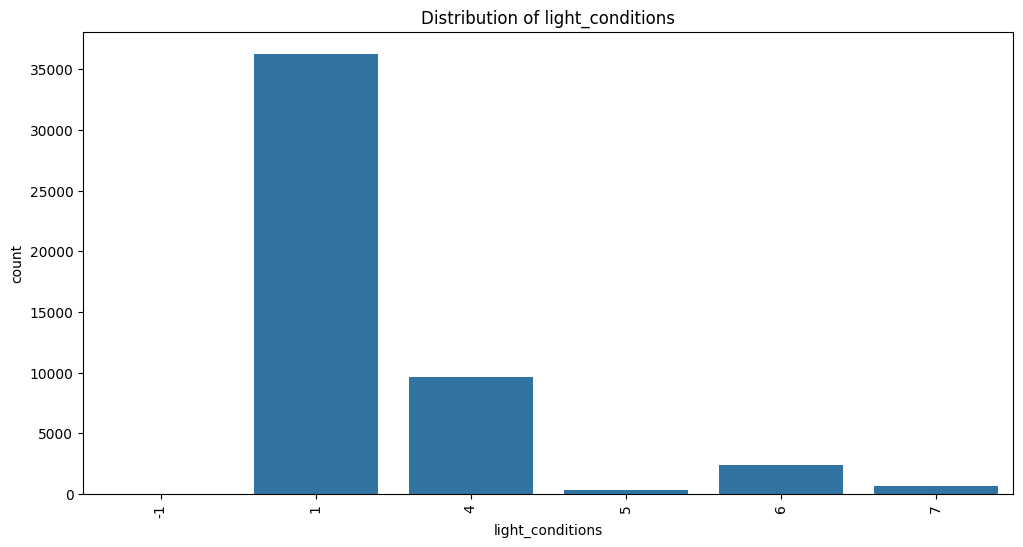

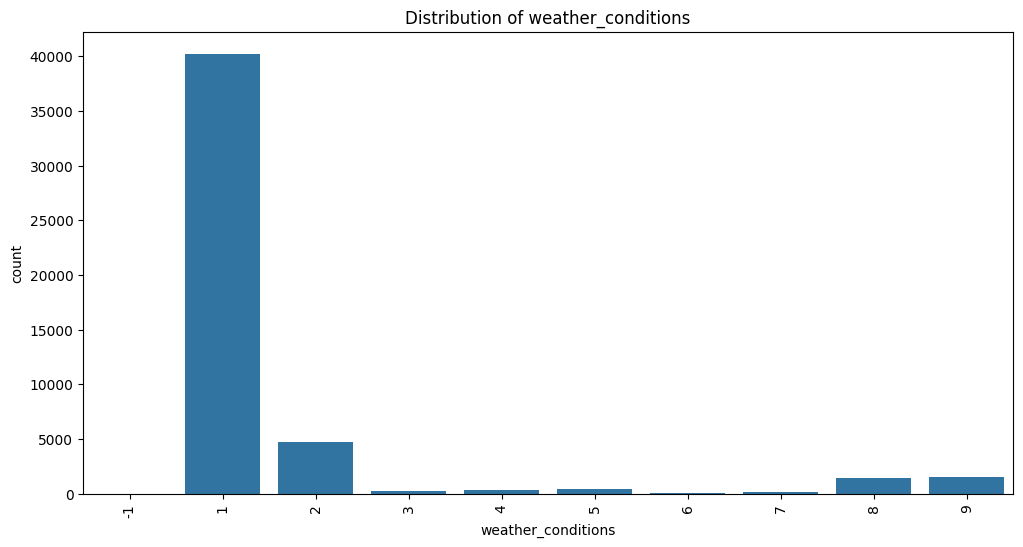

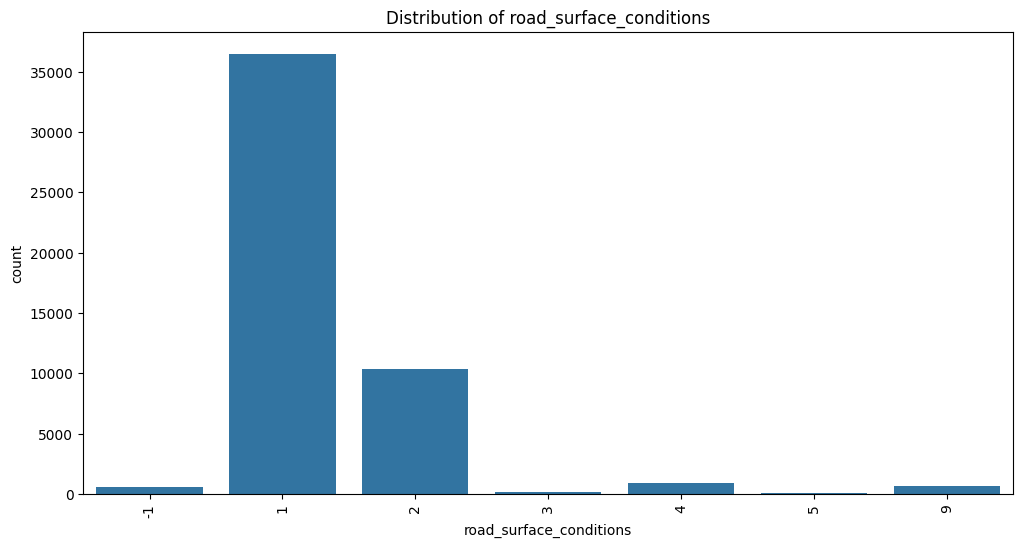

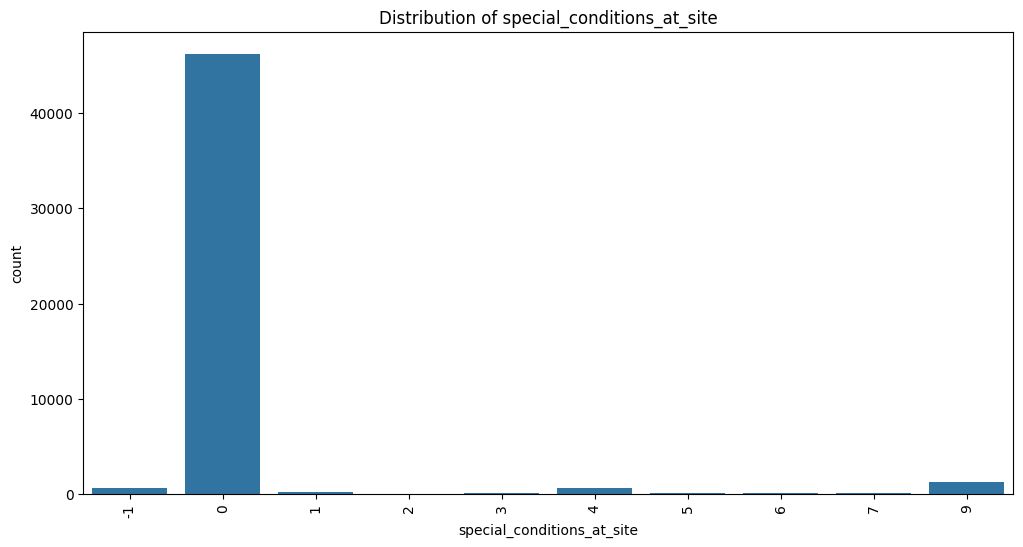

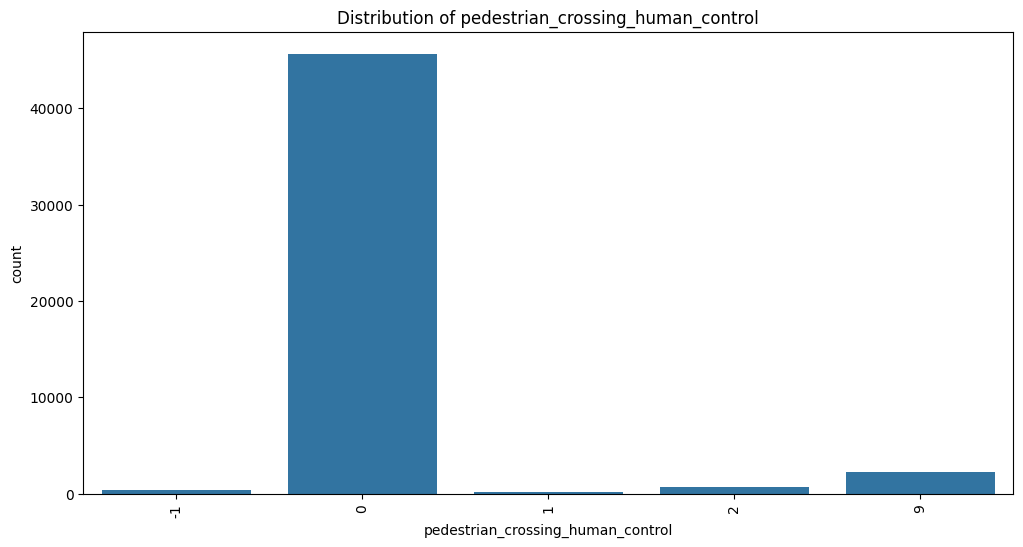

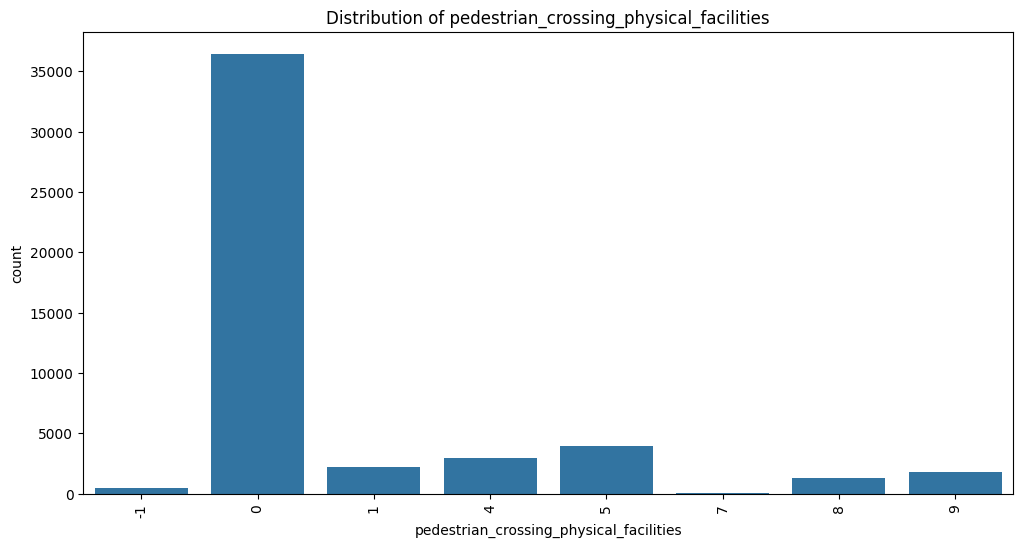

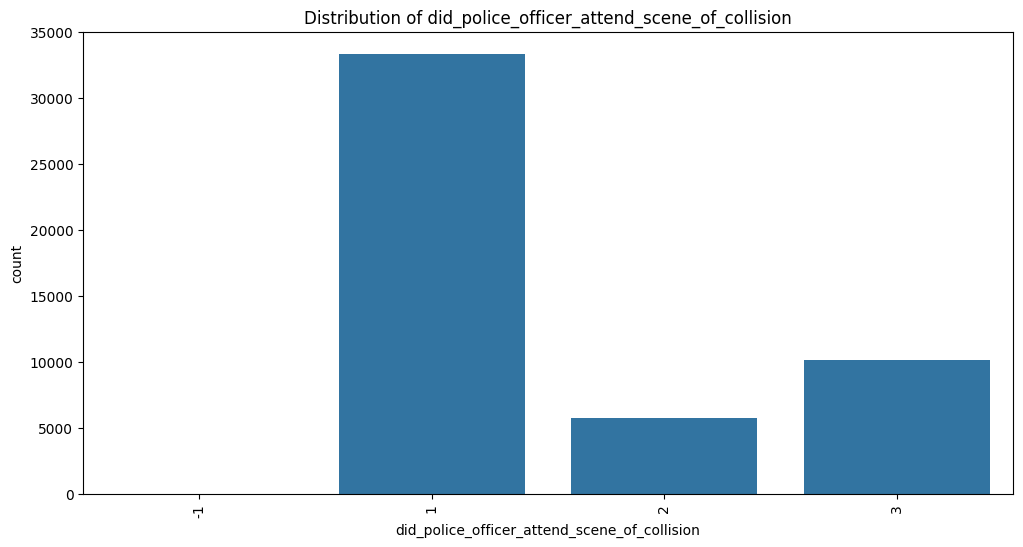

In [ ]:
# Bar plots for categorical features
categorical_cols = data_cleaned.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()


**multivariate Analysis**

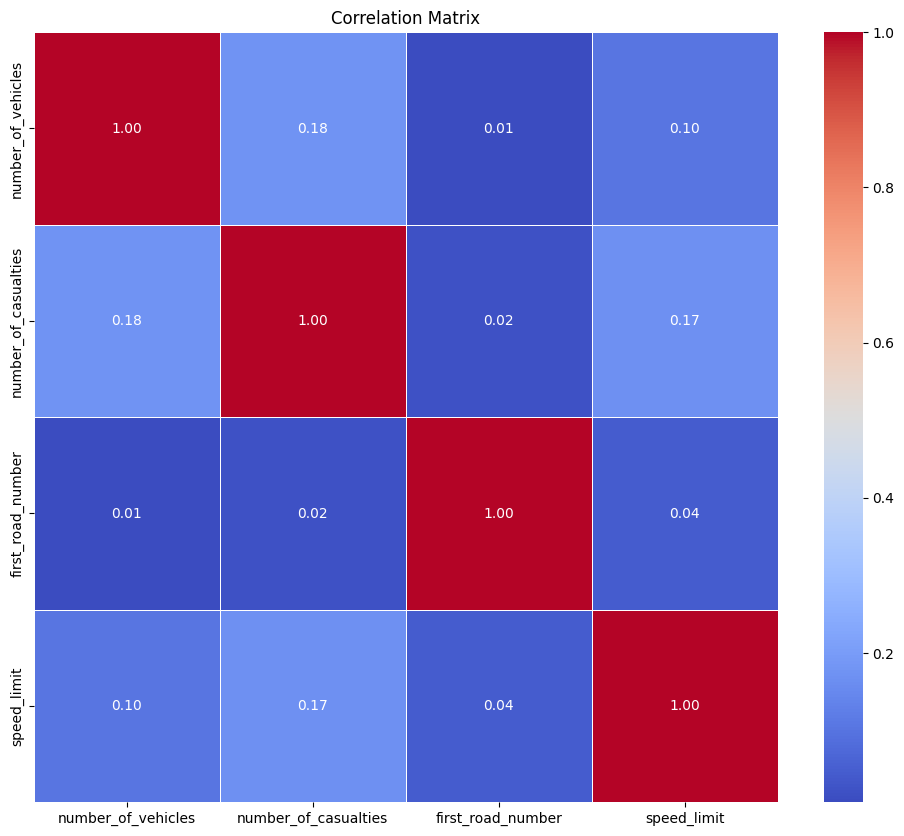

In [ ]:
# Compute and plot the correlation matrix
corr_matrix = data_cleaned[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


The correlation between number_of_vehicles and number_of_casualties is 0.176, suggesting a weak positive relationship. This means that, generally, as the number of vehicles involved in a collision increases, the number of casualties tends to increase slightly, though the correlation is weak.

There is a very weak correlation of 0.008 between number_of_vehicles and first_road_number, indicating that the road number has little to no effect on the number of vehicles involved. Similarly, the correlation of 0.103 between number_of_vehicles and speed_limit shows a weak positive relationship, suggesting that changes in the speed limit are only weakly associated with changes in the number of vehicles involved.

The correlation between number_of_casualties and first_road_number is 0.023, indicating virtually no relationship. This implies that the number of casualties does not significantly correlate with the road number. On the other hand, the correlation of 0.169 between number_of_casualties and speed_limit shows a weak positive relationship, suggesting that higher speed limits are slightly associated with an increase in casualties.

Finally, the correlation of 0.044 between first_road_number and speed_limit is very weak, indicating that variations in the road number have little impact on the speed limit. Overall, the correlations in this matrix are weak, indicating that while there are some relationships between the variables, they are not strong

**Scatter Plots for Numerical Features**

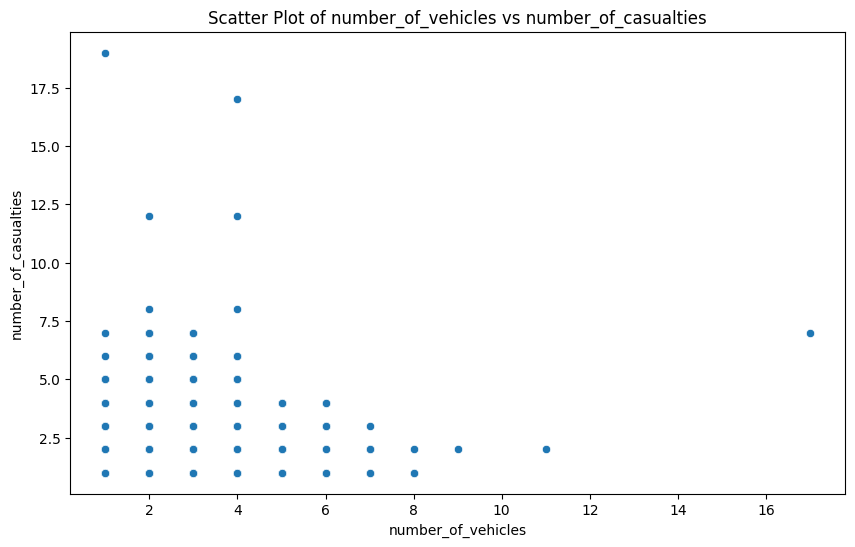

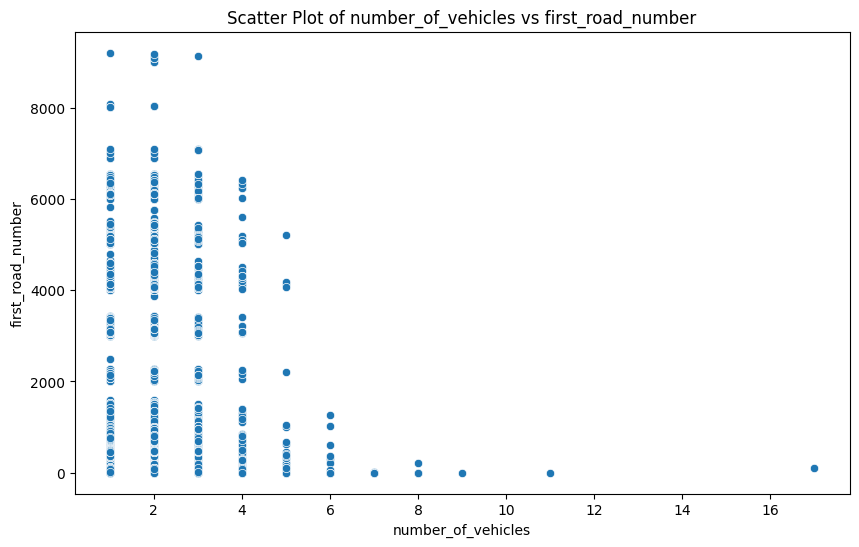

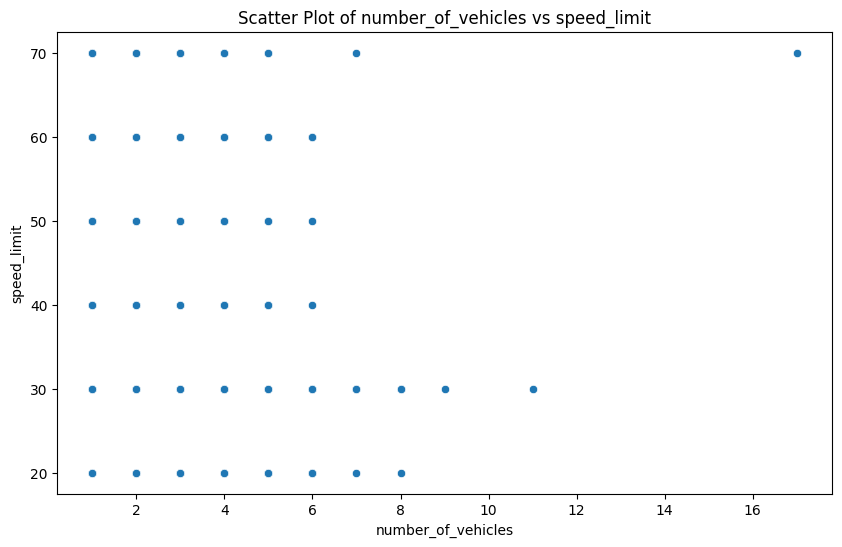

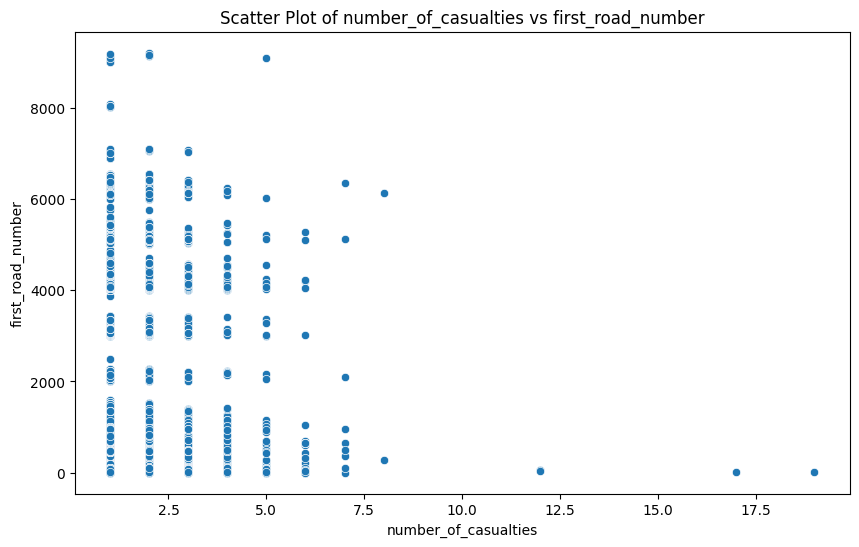

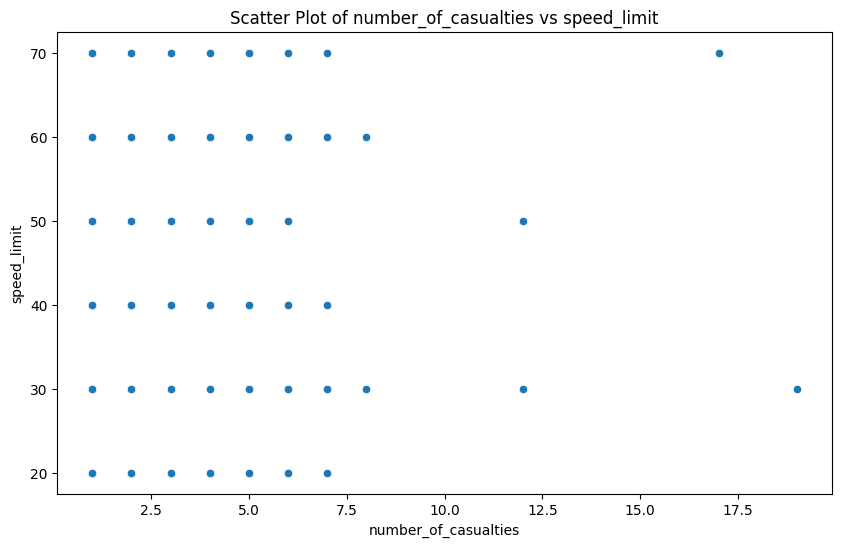

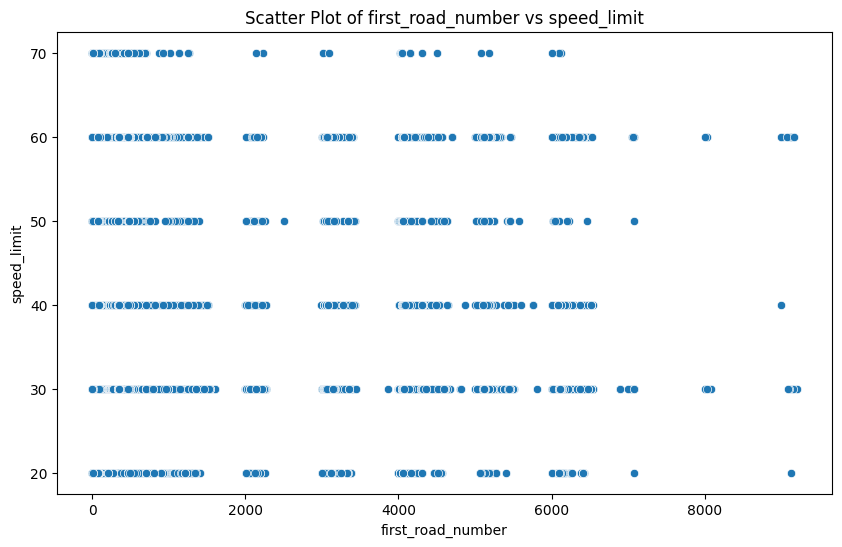

In [ ]:
# Scatter plots for pairs of numerical features
for i in range(len(numerical_cols)):
    for j in range(i + 1, len(numerical_cols)):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=data_cleaned[numerical_cols[i]], y=data[numerical_cols[j]])
        plt.title(f'Scatter Plot of {numerical_cols[i]} vs {numerical_cols[j]}')
        plt.xlabel(numerical_cols[i])
        plt.ylabel(numerical_cols[j])
        plt.show()


**Categorical vs. Numerical**

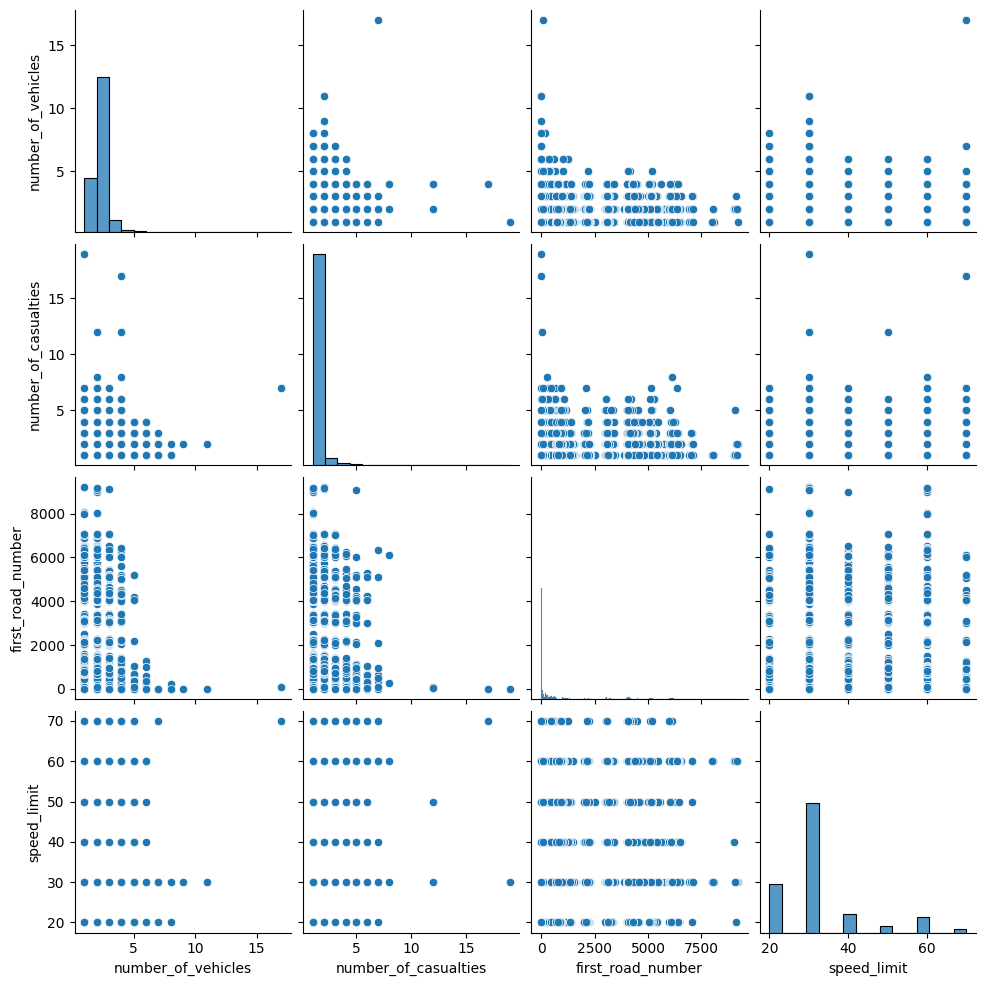

In [ ]:
# Pair plots for numerical features
sns.pairplot(data_cleaned[numerical_cols])
plt.show()


**Correlation and Relationships**

**Group Analysis**

In [ ]:
# Define numerical columns
numerical_columns = [
    'number_of_vehicles', 'number_of_casualties', 'first_road_number', 'speed_limit'
]

# Group by the target variable and compute summary statistics
grouped_summary = data_cleaned.groupby('legacy_collision_severity').agg({
    'number_of_vehicles': ['mean', 'std', 'min', 'max'],
    'number_of_casualties': ['mean', 'std', 'min', 'max'],
    'first_road_number': ['mean', 'std', 'min', 'max'],
    'speed_limit': ['mean', 'std', 'min', 'max']
})

print(grouped_summary)


                          number_of_vehicles                    \
                                        mean       std min max   
legacy_collision_severity                                        
1                                   1.751004  0.789452   1   5   
2                                   1.742936  0.630444   1   9   
3                                   1.866738  0.574745   1  17   

                          number_of_casualties                    \
                                          mean       std min max   
legacy_collision_severity                                          
1                                     1.506024  0.971864   1   6   
2                                     1.307719  0.813086   1  19   
3                                     1.223820  0.593137   1  12   

                          first_road_number                         \
                                       mean          std min   max   
legacy_collision_severity                             

<ipython-input-24-a808e4aa5f36>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_summary = data_cleaned.groupby('legacy_collision_severity').agg({


In [ ]:
# Group by 'day_of_week' and 'legacy_collision_severity' to get counts
day_of_week_summary = data_cleaned.groupby(['day_of_week', 'legacy_collision_severity']).size().unstack()
print(day_of_week_summary)


legacy_collision_severity   1    2     3
day_of_week                             
1                          30  691  2264
2                          42  803  3076
3                          27  863  3430
4                          31  900  3516
5                          38  846  3588
6                          36  887  3655
7                          45  814  2788


<ipython-input-25-57aeccd8aa02>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_of_week_summary = data_cleaned.groupby(['day_of_week', 'legacy_collision_severity']).size().unstack()


In [ ]:
# Group by 'first_road_class' and 'legacy_collision_severity' to get counts
road_class_summary = data_cleaned.groupby(['first_road_class', 'legacy_collision_severity']).size().unstack()
print(road_class_summary)


legacy_collision_severity    1     2      3
first_road_class                           
1                            2    25    147
2                            0     1     18
3                          117  2660  10144
4                           34   808   2735
5                           17   235   1326
6                           79  2075   7947


<ipython-input-26-f4b8d544b1e8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  road_class_summary = data_cleaned.groupby(['first_road_class', 'legacy_collision_severity']).size().unstack()


In [ ]:
# Group by 'road_type' and 'legacy_collision_severity' to get counts
road_type_summary = data_cleaned.groupby(['road_type', 'legacy_collision_severity']).size().unstack()
print(road_type_summary)


legacy_collision_severity    1     2      3
road_type                                  
1                           14   435   2089
2                            4   127    664
3                           33   633   2473
6                          191  4437  15518
7                            6    84    421
9                            1    88   1152


<ipython-input-27-e63ad8007c50>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  road_type_summary = data_cleaned.groupby(['road_type', 'legacy_collision_severity']).size().unstack()


In [ ]:
# Group by 'light_conditions' and 'legacy_collision_severity' to get counts
light_conditions_summary = data_cleaned.groupby(['light_conditions', 'legacy_collision_severity']).size().unstack()
print(light_conditions_summary)


legacy_collision_severity    1     2      3
light_conditions                           
1                          147  4228  16643
4                           84  1345   4839
5                            3    39    120
6                           10   138    394
7                            5    54    321


<ipython-input-28-dd5634f24a93>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  light_conditions_summary = data_cleaned.groupby(['light_conditions', 'legacy_collision_severity']).size().unstack()


In [ ]:
# Pivot table to analyze average number of vehicles by day of week and severity
pivot_table = pd.pivot_table(data_cleaned, values='number_of_vehicles', index='day_of_week', columns='legacy_collision_severity', aggfunc='mean')
print(pivot_table)

# Statistical tests (e.g., ANOVA) to determine if differences in numerical features are statistically significant across groups
from scipy.stats import f_oneway

# Example: ANOVA for number_of_casualties across collision severities
groups = [data_cleaned[data_cleaned['legacy_collision_severity'] == sev]['number_of_casualties'] for sev in data_cleaned['legacy_collision_severity'].unique()]
anova_results = f_oneway(*groups)
print(f'ANOVA results for number_of_casualties across collision severities: F-statistic = {anova_results.statistic}, p-value = {anova_results.pvalue}')


legacy_collision_severity         1         2         3
day_of_week                                            
1                          1.766667  1.761216  1.877650
2                          1.738095  1.764633  1.864109
3                          1.740741  1.712630  1.870262
4                          1.806452  1.741111  1.855802
5                          1.710526  1.751773  1.870959
6                          1.833333  1.741826  1.862654
7                          1.688889  1.732187  1.870158
ANOVA results for number_of_casualties across collision severities: F-statistic = 59.1767035037725, p-value = 2.2560506181751876e-26


**ANOVA Results:**
Purpose of ANOVA (Analysis of Variance):

ANOVA is used to determine if there are statistically significant differences in the average number of casualties across different levels of collision severity.
F-statistic:

The F-statistic of 59.177 indicates the ratio of the variance between the groups (different severity levels) to the variance within the groups (within each severity level). A higher F-statistic suggests a greater likelihood that the differences in means are statistically significant.
p-value:

The p-value of 2.256 x 10^-26 is extremely small, far below the common significance level of 0.05. This indicates a very strong statistical significance.

The ANOVA results suggest that there is a statistically significant difference in the average number of casualties across the different levels of legacy_collision_severity. The small p-value indicates that these differences are not due to random chance, and there is a high likelihood that the severity of the collision impacts the number of casualties significantly. The table shows how these average casualties vary by day of the week and severity level, providing insight into patterns and trends.

In [ ]:
#treating outliers
from scipy import stats

def remove_outliers_zscore(df, columns, threshold=3):
    df_cleaned = df.copy()
    for column in columns:
        z_scores = stats.zscore(df_cleaned[column])
        df_cleaned = df_cleaned[(z_scores < threshold) & (z_scores > -threshold)]
    return df_cleaned

data_cleaned = remove_outliers_zscore(data_cleaned, numerical_columns)

# Check how many rows were removed
print(f"Rows before removing outliers: {data_cleaned.shape[0]}")
print(f"Rows after removing outliers: {data_cleaned.shape[0]}")


Rows before removing outliers: 26455
Rows after removing outliers: 26455


In [ ]:
value_counts = data_cleaned['legacy_collision_severity'].value_counts()

print(value_counts)
print("There is imbalance in the data")

legacy_collision_severity
3    20933
2     5308
1      214
Name: count, dtype: int64
There is imbalance in the data


# Predictive Modeling

In [ ]:
# Define feature columns and target variable
features = [
    'number_of_vehicles', 'number_of_casualties', 'day_of_week',
    'first_road_class', 'first_road_number', 'road_type', 'speed_limit',
    'junction_detail', 'junction_control', 'light_conditions',
    'weather_conditions', 'road_surface_conditions',
    'special_conditions_at_site', 'pedestrian_crossing_human_control',
    'pedestrian_crossing_physical_facilities',
    'did_police_officer_attend_scene_of_collision'
]
target = 'legacy_collision_severity'

X = data_cleaned[features]
y = data_cleaned[target]


In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
numerical_columns = [
   'number_of_vehicles', 'number_of_casualties', 'first_road_number'
]
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

<ipython-input-33-abecf8c5ae5b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_columns] = scaler.fit_transform(X[numerical_columns])


In [ ]:
y_resampled.value_counts()

,count
legacy_collision_severity,
1,20933
2,20933
3,20933


In [ ]:
# Create a DataFrame for the resampled target variable
df_resampled = pd.DataFrame({'legacy_collision_severity': y_resampled})


<ipython-input-36-391bb4dd5ac5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_resampled, x='legacy_collision_severity', palette='viridis')


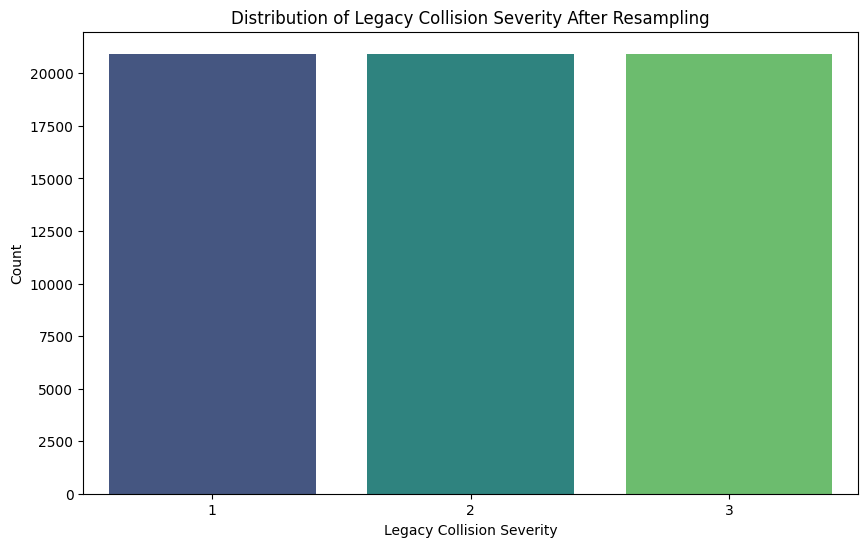

In [ ]:
# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(data=df_resampled, x='legacy_collision_severity', palette='viridis')
plt.title('Distribution of Legacy Collision Severity After Resampling')
plt.xlabel('Legacy Collision Severity')
plt.ylabel('Count')
plt.show()


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


**Model Training and Evaluation**

In [ ]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Train and evaluate models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_resampled, y_resampled)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation
    print(f"{model_name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


Training Random Forest...
Random Forest Confusion Matrix:
[[6263   22    8]
 [   2 6077  219]
 [   5  335 5909]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      6293
           2       0.94      0.96      0.95      6298
           3       0.96      0.95      0.95      6249

    accuracy                           0.97     18840
   macro avg       0.97      0.97      0.97     18840
weighted avg       0.97      0.97      0.97     18840

--------------------------------------------------
Training Logistic Regression...
Logistic Regression Confusion Matrix:
[[4038 1856  399]
 [2548 2548 1202]
 [1476 1792 2981]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.64      0.56      6293
           2       0.41      0.40      0.41      6298
           3       0.65      0.48      0.55      6249

    accuracy                    

**Hyperparameter Tuning**

In [ ]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.98      0.98      6293
           2       0.83      0.80      0.82      6298
           3       0.81      0.85      0.83      6249

    accuracy                           0.88     18840
   macro avg       0.88      0.88      0.87     18840
weighted avg       0.88      0.88      0.88     18840

Random Forest Confusion Matrix:
[[6182   61   50]
 [  88 5020 1190]
 [  26  937 5286]]


In [ ]:
from sklearn.metrics import classification_report

# Assume y_test and y_pred are defined
report = classification_report(y_test, y_pred, output_dict=True)

for label, metrics in report.items():
    if label == 'accuracy':
        print(f"Accuracy: {metrics:.2f}")
    else:
        print(f"Label: {label}")
        print(f"  Precision: {metrics['precision']:.2f}")
        print(f"  Recall: {metrics['recall']:.2f}")
        print(f"  F1-Score: {metrics['f1-score']:.2f}")
        print()


**Confusion Matrix Heatmap**

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

**. ROC Curve**

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


**Feature Importance Plot**

In [ ]:
# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(X.columns)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


In [ ]:
# Install joblib if not already installed
!pip install joblib

# Import necessary modules
import joblib
from google.colab import files

# Save the model to a file using joblib with compression
model_filename = 'random_forest_model_compressed.joblib'
joblib.dump(rf_model, model_filename, compress=3)  # Using compression level 3 for a balance between file size and speed
print(f"Model saved to '{model_filename}' with compression.")

# Download the model file in Google Colab
print("Downloading the model file...")
files.download(model_filename)
print("Download initiated.")


Model saved to 'random_forest_model_compressed.joblib' with compression.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download initiated.
